## Observations and Insights

Mean tumor size for all treatment groups was 45 cm3, which is strange becuase one would expect every animal(mouse) to have a different size tumor to start with. Even implanted tumor would have some variation in volume. 

Of the four drugs we focued on Capomulin, Ceftamin, Ramicane and Infubinol only Capomulin and Ramicane reduced tumor volume over the 45 days of treatment (I am assuming day as i could not find the units on time). 

Caftamin and Infubinol did not inhibit tumor growth over the 45 days of treatment, thus resulting in increased tumor volume. 


## Dependencies and starter code

In [167]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# The following was code was used https://github.com/c-l-nguyen/pymaceuticals/blob/master/pymaceuticals.ipynb

## Summary statistics

In [168]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [169]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [170]:
mouse_metadata.info()
mouse_metadata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
Mouse ID        249 non-null object
Drug Regimen    249 non-null object
Sex             249 non-null object
Age_months      249 non-null int64
Weight (g)      249 non-null int64
dtypes: int64(2), object(3)
memory usage: 9.9+ KB


,Age_months,Weight (g)
count,249.000000,249.000000
mean,12.730924,26.116466
std,7.228687,3.697003
min,1.000000,15.000000
25%,6.000000,25.000000
50%,13.000000,27.000000
75%,19.000000,29.000000
max,24.000000,30.000000


In [171]:
study_results.info()
study_results.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 4 columns):
Mouse ID              1893 non-null object
Timepoint             1893 non-null int64
Tumor Volume (mm3)    1893 non-null float64
Metastatic Sites      1893 non-null int64
dtypes: float64(1), int64(2), object(1)
memory usage: 59.3+ KB


,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659
std,14.079460,8.894722,1.137974
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.951474,1.000000
75%,30.000000,56.292200,2.000000
max,45.000000,78.567014,4.000000


In [172]:

TimothyQMouse = list(mouse_metadata["Mouse ID"].value_counts().index)
DangerMouse = list(study_results["Mouse ID"].value_counts().index)

def missing_mice(left, right):
    missing_mice_count = 0
    
    for mouse_id in left:
        if mouse_id not in right:
            missing_mice_count += 1
    
    return missing_mice_count

mouse_df_only = missing_mice(TimothyQMouse, DangerMouse)
trial_df_only = missing_mice(DangerMouse, TimothyQMouse)
print(f"Mouse IDs in mouse_df only: {mouse_df_only}")
print(f"Mouse IDs in trial_df only: {trial_df_only}")

Mouse IDs in mouse_df only: 0
Mouse IDs in trial_df only: 0


In [173]:
#Shoot there is an extra mouse in the trial data. I don't know what to do with it. Should i drop it?
#drug_count = mouse_metadata.groupby("Mouse ID").agg({"Drug Regimen":"count"})
#drug_count.query("Drug Regimen > 1")

In [174]:
mouse_metadata = mouse_metadata[mouse_metadata["Mouse ID"] != 'g989']
mouse_metadata

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16
...,...,...,...,...,...
244,z314,Stelasyn,Female,21,28
245,z435,Propriva,Female,12,26
246,z581,Infubinol,Female,24,25
247,z795,Naftisol,Female,13,29


In [175]:
Reepicheep_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="outer")

Reepicheep_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9.0,22.0
1,b128,5,45.651331,0,Capomulin,Female,9.0,22.0
2,b128,10,43.270852,0,Capomulin,Female,9.0,22.0
3,b128,15,43.784893,0,Capomulin,Female,9.0,22.0
4,b128,20,42.731552,0,Capomulin,Female,9.0,22.0


In [14]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [215]:
#Mean tumor response
Mean_df = Reepicheep_df.groupby(["Drug Regimen","Timepoint"],as_index=False).agg({"Tumor Volume (mm3)":"mean"})
# Minor Data Munging to Re-Format the Data Frames
reshaped_Mean_df = Mean_df.pivot(index="Timepoint", columns = "Drug Regimen")

# Preview that Reformatting worked
reshaped_Mean_df.columns = reshaped_Mean_df.columns.droplevel()
reshaped_Mean_df.head(15)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,46.541247,47.389175,46.796098,47.125589,47.168130,43.944859,47.470830,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,48.938560,42.531957,49.335368,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,50.891769,41.495061,51.448025,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.127384,40.238325,53.970080,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.462490,38.974300,56.172821,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.122548,38.703137,59.870528,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.103457,37.451996,62.432021,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [216]:
#Median tumor response
Median_df = Reepicheep_df.groupby(["Drug Regimen","Timepoint"],as_index=False).agg({"Tumor Volume (mm3)":"median"})
# Minor Data Munging to Re-Format the Data Frames
reshaped_Median_df = Median_df.pivot(index="Timepoint", columns = "Drug Regimen")

# Preview that Reformatting worked
reshaped_Median_df.columns = reshaped_Median_df.columns.droplevel()
reshaped_Median_df.head(15)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,45.597064,46.370798,46.870483,47.059664,46.621301,46.989764,46.941015,45.521875,47.054185,46.736212
10,43.421014,48.164520,49.471244,49.797416,48.185373,49.109721,48.899552,42.832023,48.925056,48.334346
15,42.798160,49.746427,51.265440,52.246310,50.666054,51.271314,50.854632,41.262007,51.166757,50.583557
20,40.716428,52.112973,53.862724,54.250054,52.855576,53.006865,53.616863,40.772803,53.983436,52.693423
25,40.224165,54.275954,55.924633,56.957917,56.928663,57.106418,55.754083,38.097513,56.522591,55.676604
30,39.260371,56.362744,59.133640,60.296505,59.789636,59.916934,58.679651,38.242066,60.605440,57.419744
35,38.360455,58.208362,60.722723,62.539154,61.893153,62.970450,60.862159,37.624710,63.756990,60.365832
40,36.843898,60.600972,63.344283,66.229606,65.466074,66.287744,62.324348,35.668692,67.396174,62.274543


In [218]:
#Variance tumor response
Var_df = Reepicheep_df.groupby(["Drug Regimen","Timepoint"],as_index=False).agg({"Tumor Volume (mm3)":"var"})
# Minor Data Munging to Re-Format the Data Frames
reshaped_Var_df = Var_df.pivot(index="Timepoint", columns = "Drug Regimen")

# Preview that Reformatting worked
reshaped_Var_df.columns = reshaped_Var_df.columns.droplevel()
reshaped_Var_df.head(15)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,5.030889,0.568299,5.689821,1.612964,0.942076,1.141526,1.345210,5.831150,1.493585,0.856853
10,12.344133,1.115284,1.674104,2.810499,2.142546,3.879727,3.172853,12.449365,4.472114,1.532725
15,16.878693,2.094922,2.687010,6.397507,4.146905,7.551257,3.780418,14.245578,5.963724,2.883366
20,19.035028,2.326097,4.535510,10.027796,7.086694,13.393928,5.534232,14.216521,8.906693,4.832817
25,17.100444,3.474610,5.451230,10.842320,11.918128,18.206321,5.030140,12.833914,11.072836,5.808348
30,19.210721,3.851331,6.770048,15.706472,14.273894,22.261308,7.816055,17.205421,15.439026,9.601024
35,24.358640,6.708893,11.622731,21.625434,15.415904,23.206488,12.557133,19.654473,17.250985,10.876760
40,31.441568,7.027713,11.134885,20.130057,18.767896,22.543652,22.036801,25.467778,23.871927,13.958456


In [217]:
#Standard Deviation tumor response
std_df = Reepicheep_df.groupby(["Drug Regimen","Timepoint"],as_index=False).agg({"Tumor Volume (mm3)":"std"})
# Minor Data Munging to Re-Format the Data Frames
reshaped_std_df = std_df.pivot(index="Timepoint", columns = "Drug Regimen")

# Preview that Reformatting worked
reshaped_std_df.columns = reshaped_std_df.columns.droplevel()
reshaped_std_df.head(15)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,2.242964,0.753856,2.385335,1.270025,0.970606,1.068422,1.159832,2.414777,1.222123,0.925664
10,3.513422,1.056070,1.293872,1.676454,1.463744,1.969702,1.781250,3.528366,2.114737,1.238033
15,4.108369,1.447385,1.639210,2.529329,2.036395,2.747955,1.944330,3.774331,2.442074,1.698048
20,4.362915,1.525155,2.129674,3.166670,2.662084,3.659772,2.352495,3.770480,2.984408,2.198367
25,4.135268,1.864031,2.334787,3.292768,3.452264,4.266887,2.242797,3.582445,3.327587,2.410052
30,4.383004,1.962481,2.601931,3.963139,3.778081,4.718189,2.795721,4.147942,3.929253,3.098552
35,4.935447,2.590153,3.409213,4.650315,3.926309,4.817311,3.543605,4.433337,4.153431,3.297993
40,5.607278,2.650983,3.336898,4.486653,4.332193,4.748016,4.694337,5.046561,4.885891,3.736102


In [221]:
#Standard Error tumor response
Sem_df = Reepicheep_df.groupby(["Drug Regimen","Timepoint"],as_index=False).agg({"Tumor Volume (mm3)":"sem"})
# Minor Data Munging to Re-Format the Data Frames
reshaped_Sem_df = Sem_df.pivot(index="Timepoint", columns = "Drug Regimen")

# Preview that Reformatting worked
reshaped_Sem_df.columns = reshaped_Sem_df.columns.droplevel()
reshaped_Sem_df.head(15)

Drug Regimen,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.477067,0.264819,0.202385,0.218091,0.241842,0.482955,0.254830,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.388701,0.720225,0.461474,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.502024,0.770432,0.532904,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.607412,0.786199,0.684670,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.622040,0.746991,0.784320,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.807055,0.864906,0.952984,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.181202,0.967433,1.072411,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


## Bar plots

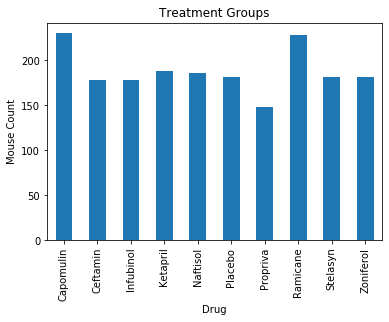

<Figure size 432x288 with 0 Axes>

In [181]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
TreatmentGroups = Reepicheep_df.groupby("Drug Regimen")
TreatmentGroups
# Find out how many of each gender took bike trips
Despereaux = TreatmentGroups["Drug Regimen"].count()

# Chart our data, give it a title, and label the axes
Treatment_chart = Despereaux.plot(kind="bar", title="Treatment Groups")
Treatment_chart.set_xlabel("Drug")
Treatment_chart.set_ylabel("Mouse Count")

plt.show()
plt.tight_layout()

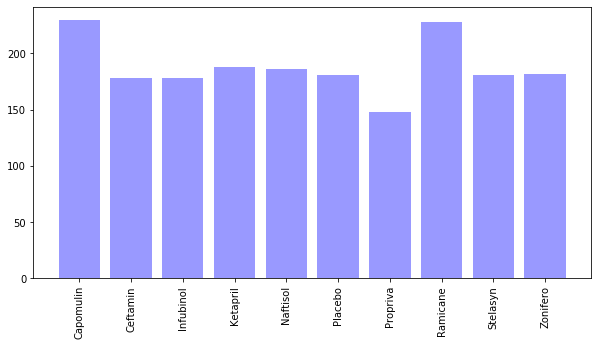

In [213]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
import numpy as np

TreatmentGroups = Reepicheep_df.groupby("Drug Regimen")
TreatmentGroups
# Find out how many of each gender took bike trips
Despereaux = TreatmentGroups["Drug Regimen"].count()
Despereaux.head()
x_axis = np.arange(len(TreatmentGroups))
tick_locations = [value for value in x_axis]
 #Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(10,5))
plt.bar(x_axis, Despereaux, color='b', alpha=0.4, align="center")
plt.xticks(tick_locations, ["Capomulin","Ceftamin","Infubinol","Ketapril","Naftisol","Placebo","Propriva","Ramicane",
                            "Stelasyn","Zonifero"], rotation="vertical")
plt.show()


## Pie plots

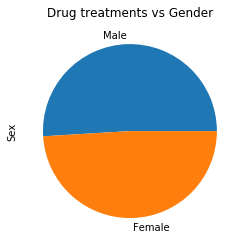

<Figure size 432x288 with 0 Axes>

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
SexGroups = Reepicheep_df["Sex"].value_counts()
SexGroups.head()
# Find out how many of each gender took bike trips

# Place the gender keys for that single bike into a list
SexList = SexGroups.keys()

# Create a pie chart based upon the trip duration of that single bike
Sex_pie = SexGroups.plot(kind="pie", y=SexList, title=("Drug treatments vs Gender"))
Sex_pie.set_ylabel("Sex")

plt.show()
plt.tight_layout()
#plt.axis("equal")

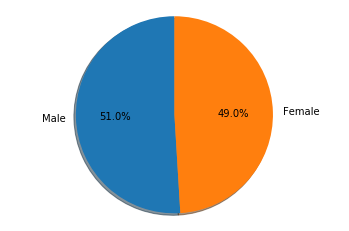

In [184]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
SexGroups = Reepicheep_df["Sex"].value_counts()
SexGroups.head()

labels = 'Male', 'Female',
sizes = [958, 922]
#explode = (0, 0.1, 0, 0)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


## Quartiles, outliers and boxplots

In [185]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
FindTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
FindDrug = FindTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Capomulin"]
Capomulin = FindDrug["Tumor Volume (mm3)"]
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Capomulin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
f"Upper Outliners:{Capomulin.loc[Capomulin > upper_bound]}"
f"Lower Outliners:{Capomulin.loc[Capomulin > lower_bound]}"
print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")


The lower quartile of final tumor volume is: 32.37735684
The upper quartile of final tumor volume is: 40.1592203
The interquartile range of final tumor volume is: 7.781863460000004
The the median of final tumor volume is: 37.31184577 
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.


In [186]:
FIndTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
FindDRug = FIndTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Ceftamin"]
Ceftamin = FindDRug["Tumor Volume (mm3)"]
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Ceftamin.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
f"Upper Outliners:{Ceftamin.loc[Ceftamin > upper_bound]}"
f"Lower Outliners:{Ceftamin.loc[Ceftamin > lower_bound]}"
print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 61.43389223
The upper quartile of final tumor volume is: 67.52748237
The interquartile range of final tumor volume is: 6.093590140000003
The the median of final tumor volume is: 64.29983003 
Values below 52.29350701999999 could be outliers.
Values above 76.66786758 could be outliers.


In [187]:
FiNdTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
FindDrUg = FiNdTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Ramicane"]
Ramicane = FindDrUg["Tumor Volume (mm3)"]
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Ramicane.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
f"Upper Outliners:{Ramicane.loc[Ramicane > upper_bound]}"
f"Lower Outliners:{Ramicane.loc[Ramicane > lower_bound]}"
print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 30.981175224999998
The upper quartile of final tumor volume is: 38.508305307499995
The interquartile range of final tumor volume is: 7.527130082499998
The the median of final tumor volume is: 34.848627300000004 
Values below 19.690480101250003 could be outliers.
Values above 49.79900043124999 could be outliers.


In [188]:
FinDTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
FindDruG = FinDTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Infubinol"]
Infubinol 
# If the data is in a dataframe, we use pandas to give quartile calculations
quartiles = Infubinol.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
f"Upper Outliners:{Infubinol.loc[Infubinol > upper_bound]}"
f"Lower Outliners:{Infubinol.loc[Infubinol > lower_bound]}"
print(f"The lower quartile of final tumor volume is: {lowerq}")
print(f"The upper quartile of final tumor volume is: {upperq}")
print(f"The interquartile range of final tumor volume is: {iqr}")
print(f"The the median of final tumor volume is: {quartiles[0.5]} ")
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of final tumor volume is: 62.75445141
The upper quartile of final tumor volume is: 67.68556862
The interquartile range of final tumor volume is: 4.9311172099999965
The the median of final tumor volume is: 66.08306589 
Values below 55.35777559500001 could be outliers.
Values above 75.08224443499999 could be outliers.


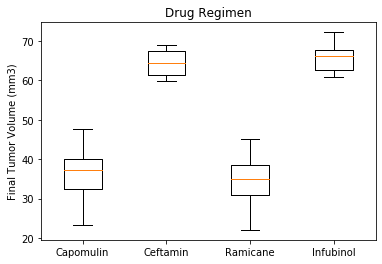

In [220]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#FindTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
#FindDrug = FindTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Capomulin"]
#Capomulin = FindDrug["Tumor Volume (mm3)"]

#FIndTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
#FindDRug = FIndTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Ceftamin"]
#Ceftamin = FindDRug["Tumor Volume (mm3)"]

#FiNdTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
#FindDrUg = FiNdTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Ramicane"]
#Ramicane = FindDrUg["Tumor Volume (mm3)"]

#FinDTimepoint = Reepicheep_df.loc[Reepicheep_df["Timepoint"] == 45]
#FindDruG = FinDTimepoint.loc[Reepicheep_df["Drug Regimen"] == "Infubinol"]
#Infubinol 

Drugs =[Capomulin, Ceftamin, Ramicane, Infubinol]

fig1, ax1 = plt.subplots()
ax1.set_title("Drug Regimen")
ax1.set_ylabel("Final Tumor Volume (mm3)")
ax1.set_xticklabels(["Capomulin", "Ceftamin", "Ramicane", "Infubinol"])
ax1.boxplot(Drugs)
plt.show()


## Line and scatter plots

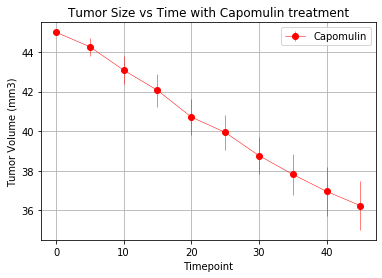

In [212]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
drugs = {"Capomulin":['o','r']}

for drug,styles in drugs.items():
    plt.errorbar(list(reshaped_Mean_df.index), reshaped_Mean_df[drug],reshaped_Sem_df[drug], 
                 linewidth=0.5, label=drug, marker=styles[0], color=styles[1]);

plt.title("Tumor Size vs Time with Capomulin treatment");
plt.xlabel("Timepoint");
plt.ylabel("Tumor Volume (mm3)");
plt.legend();
plt.grid()

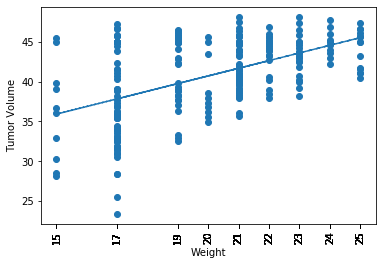

In [419]:
Blah = Reepicheep_df.loc[Reepicheep_df["Drug Regimen"] == "Capomulin"]
from scipy import stats
FievelMousekewitz = Blah
FievelMousekewitz.head()
TumorVolume = FievelMousekewitz.iloc[:,2]
Weight= BlahBlah.iloc[:,-1]
plt.scatter( Weight, TumorVolume)
m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(Weight, TumorVolume)
m_fit = m_slope * Weight + m_int
plt.plot(Weight,m_fit,"--")
plt.xticks(Weight, rotation=90)
plt.xlabel('Weight')
plt.ylabel('Tumor Volume')

plt.show()

In [11]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen